# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the data 

In [3]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)


(7352, 564) (2947, 564)


# Data Cleaning

## 1. Check for Duplicates

In [4]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [5]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

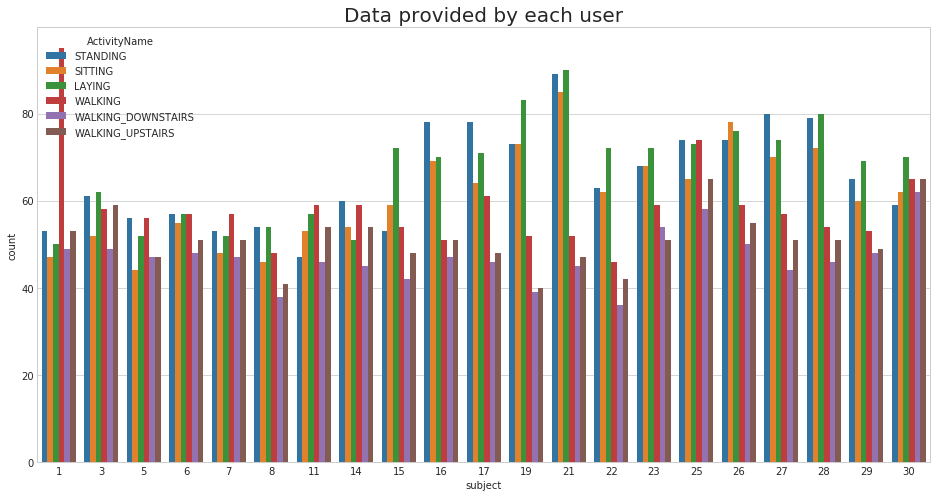

In [7]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

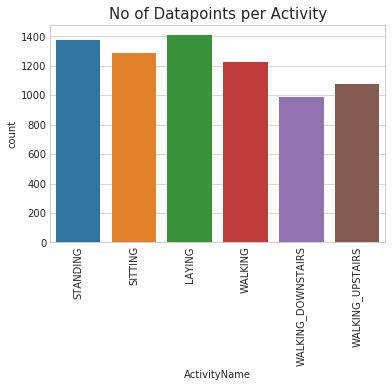

In [8]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [9]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

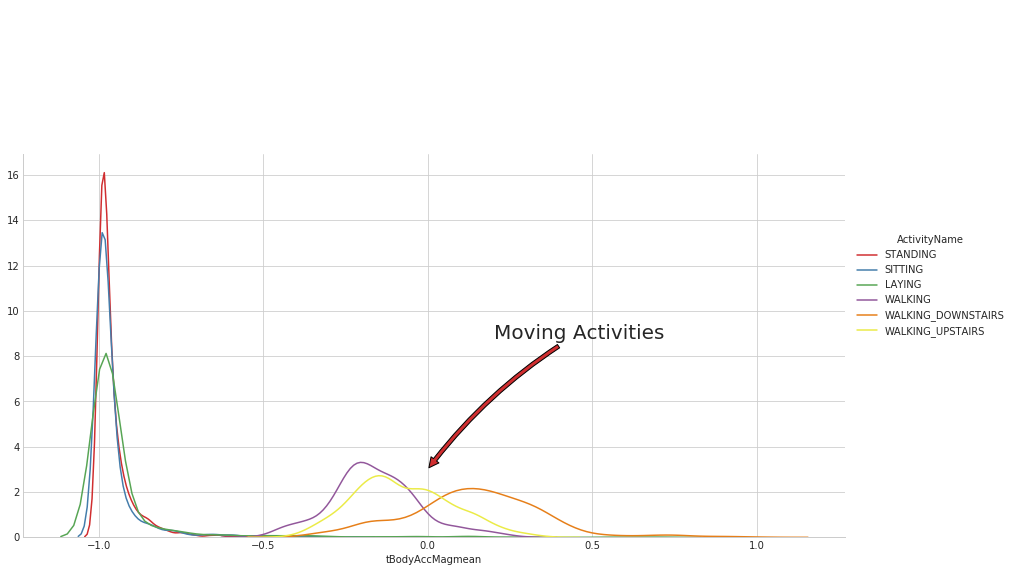

In [11]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

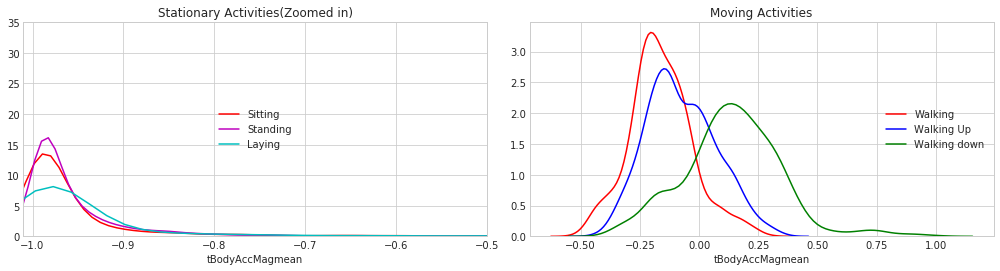

In [12]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

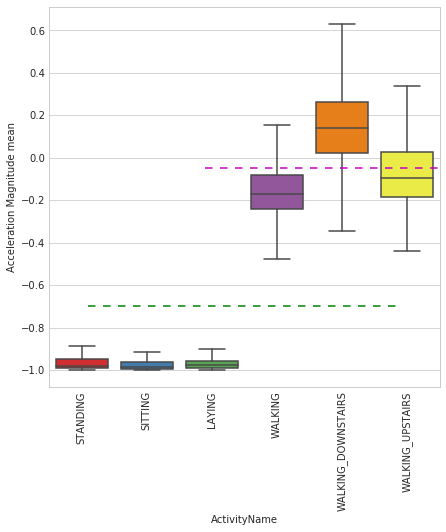

In [13]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

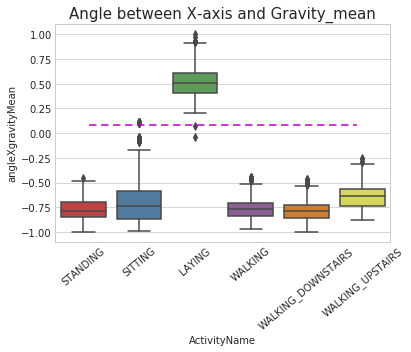

In [14]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

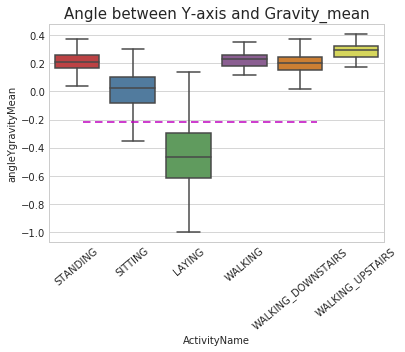

In [15]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [16]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 2.246s...
[t-SNE] Computed neighbors for 7352 samples in 55.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.082s
[t-SNE] Iteration 50: error = 124.7207642, gradient norm = 0.0274185 (50 iterations in 3.753s)
[t-SNE] Iteration 100: error = 106.6979828, gradient norm = 0.0287408 (50 iterations in

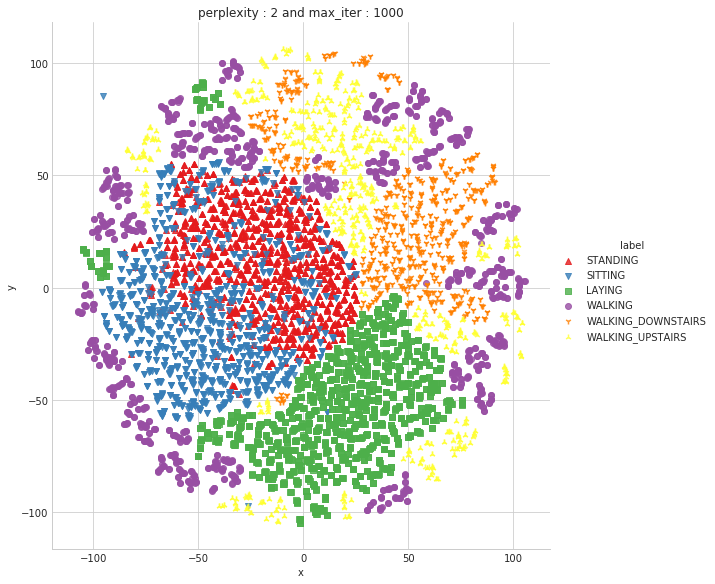

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 2.203s...
[t-SNE] Computed neighbors for 7352 samples in 54.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 114.0917969, gradient norm = 0.0206442 (50 iterations in 7.072s)
[t-SNE] Iteration 100: error = 98.1152420, gradient norm = 0.0169837 (50 iteratio

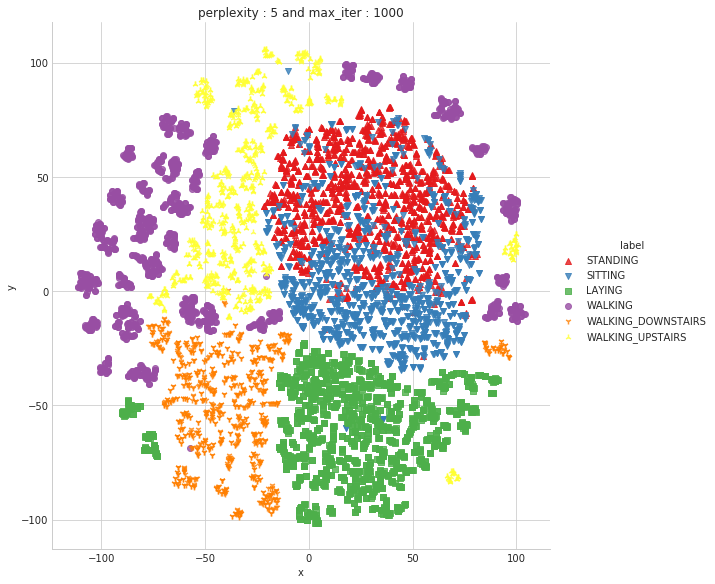

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.853s...
[t-SNE] Computed neighbors for 7352 samples in 52.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.151s
[t-SNE] Iteration 50: error = 105.7657013, gradient norm = 0.0189496 (50 iterations in 4.364s)
[t-SNE] Iteration 100: error = 90.4657440, gradient norm = 0.0102857 (50 iterati

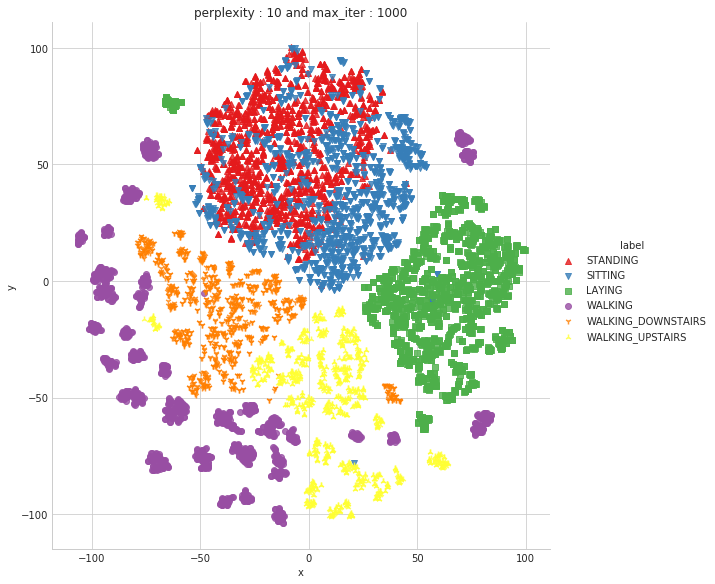

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.784s...
[t-SNE] Computed neighbors for 7352 samples in 435.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.308s
[t-SNE] Iteration 50: error = 97.9048996, gradient norm = 0.0117818 (50 iterations in 5.540s)
[t-SNE] Iteration 100: error = 84.7624588, gradient norm = 0.0079371 (50 iterati

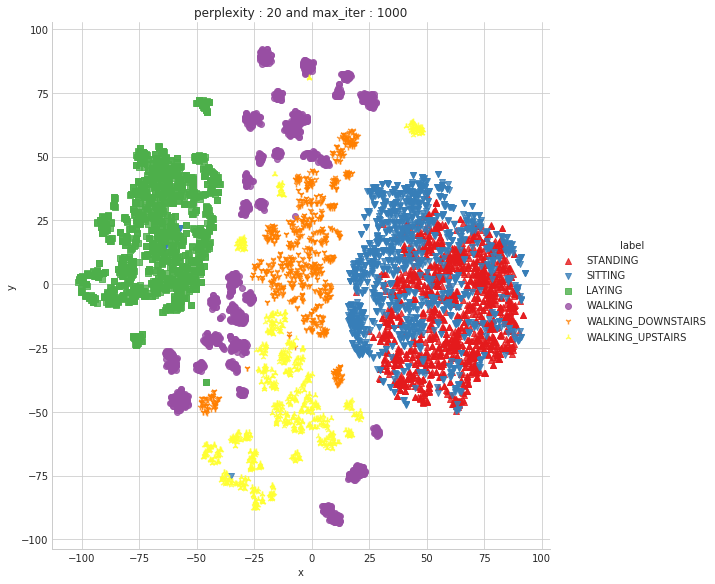

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 2.027s...
[t-SNE] Computed neighbors for 7352 samples in 58.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.858s
[t-SNE] Iteration 50: error = 85.2329178, gradient norm = 0.0307021 (50 iterations in 5.797s)
[t-SNE] Iteration 100: error = 75.5017700, gradient norm = 0.0047555 (50 iterati

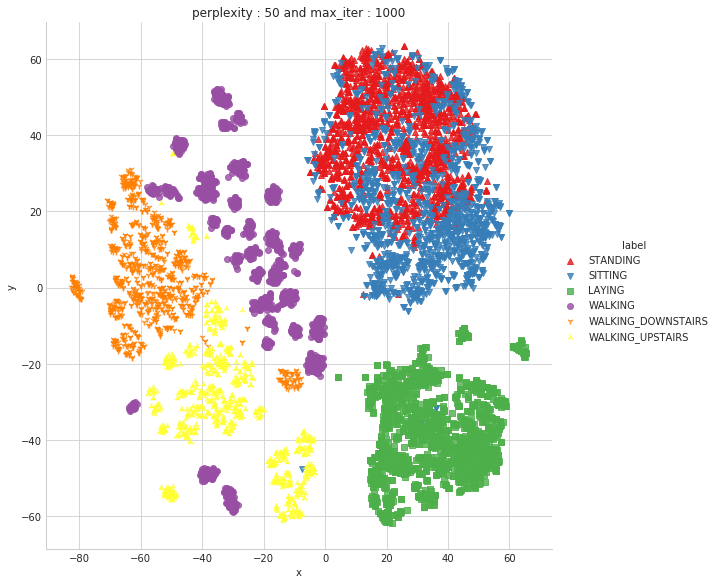

Done


In [18]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [19]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [20]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [21]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [22]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


## function to plot confusion matrix

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## function to run any model specified

In [25]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

## method to print grid search attributes

In [26]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [27]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [28]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

training the model..
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.6min finished
C:\Users\SUBHODAYA KUMAR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done 
 

training_time(HH:MM:SS.ms) - 0:08:54.277253


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.016991


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 433  54   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   3 408   9]
 [  0   0   0  24   0 447]]


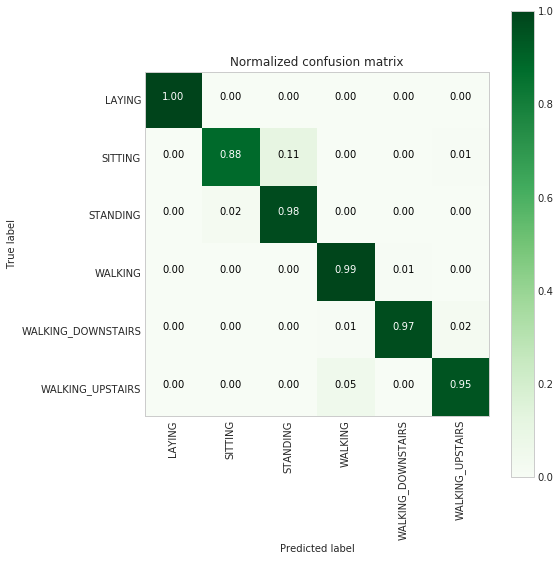

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [29]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1'], 'max_iter':[500,750,1000]}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

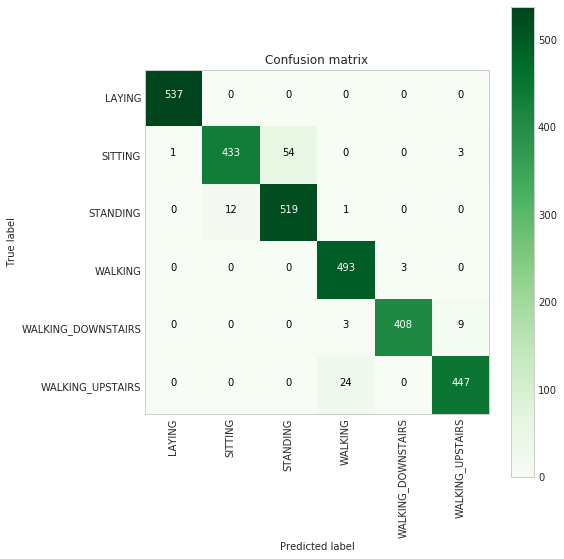

In [30]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [31]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10, 'max_iter': 500, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9434188461186187



# 2. Linear SVC with GridSearch

In [32]:
from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.8min finished
C:\Users\SUBHODAYA KUMAR\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:07:05.225342


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.013992


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


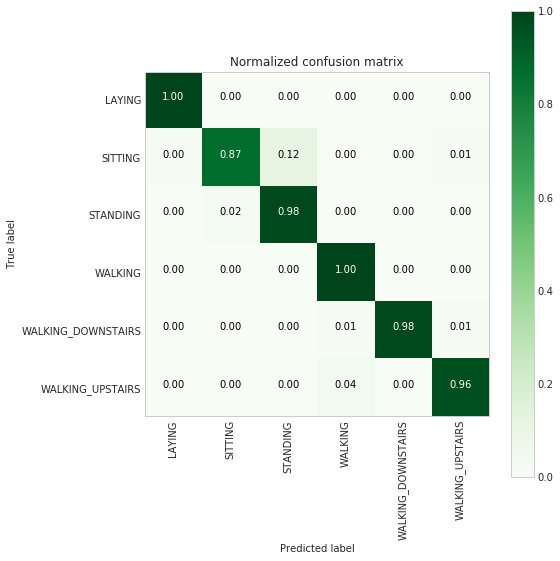

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [33]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16], 'max_iter':[2500,5000]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [34]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2500,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5, 'max_iter': 2500}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9420644015594



# 3. Kernel SVM with GridSearch

training the model..
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 24.7min finished
C:\Users\SUBHODAYA KUMAR\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:24:48.975221


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.859448


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


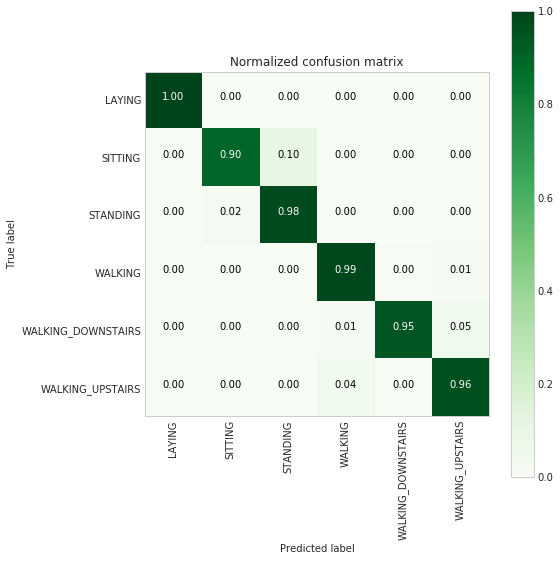

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [35]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2],\
             'max_iter':[2500,5000]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, verbose=1, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [36]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=2500, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125, 'max_iter': 2500}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



# 4. Decision Trees with GridSearchCV

training the model..
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.7s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:32.422666


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.013007


---------------------
|      Accuracy      |
---------------------

    0.8635900916185952


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  16 343  61]
 [  0   0   0  78  24 369]]


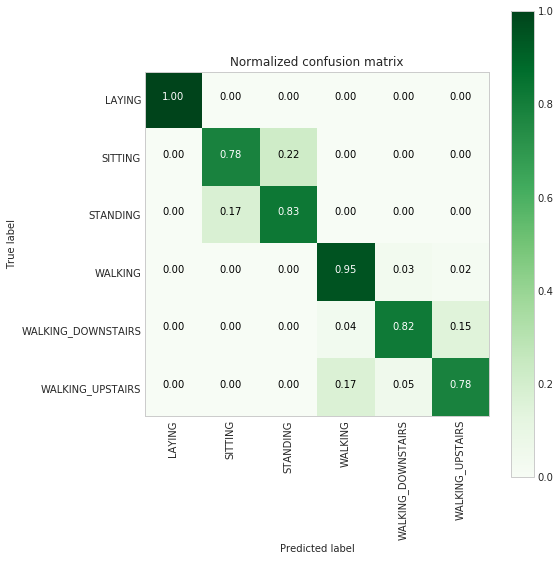

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
          

In [37]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters,verbose =1, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 6:33:24.344915


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.065963


---------------------
|      Accuracy      |
---------------------

    0.9280624363759755


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 437  54   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 485   7   4]
 [  0   0   0  20 358  42]
 [  0   0   0  38   6 427]]


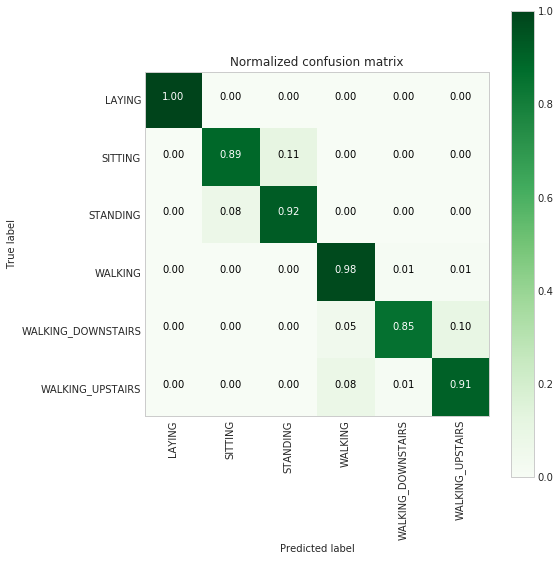

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.91       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       mi

In [38]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# Using LSTM

In [2]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [3]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}


In [4]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [5]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [6]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [7]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [8]:
print('X_train and Y_train : ({},{})'.format(X_train.shape, Y_train.shape))
print('X_test  and Y_test  : ({},{})'.format(X_test.shape, Y_test.shape))

X_train and Y_train : ((7352, 128, 9),(7352, 6))
X_test  and Y_test  : ((2947, 128, 9),(2947, 6))


In [9]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\SUBHODAYA KUMAR\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [11]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [12]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [13]:
# Plot train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()

In [14]:
# Initializing parameters
epochs = 20
batch_size = 16
n_hidden = 64

In [15]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [16]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

# 1. Using Categorical cross entropy

## Lstm with 32 Neurons and dropout = 0.5

In [26]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 63s 9ms/step - loss: 1.2493 - acc: 0.4771 - val_loss: 1.1263 - val_acc: 0.5249
Epoch 2/20
7352/7352 [==============================] - 64s 9ms/step - loss: 0.8962 - acc: 0.6400 - val_loss: 0.8150 - val_acc: 0.6583
Epoch 3/20
7352/7352 [==============================] - 78s 11ms/step - loss: 0.6823 - acc: 0.7270 - val_loss: 0.7150 - val_acc: 0.7089
Epoch 4/20
7352/7352 [==============================] - 70s 9ms/step - loss: 0.5654 - acc: 0.7847 - val_loss: 0.6458 - val_acc: 0.7598
Epoch 5/20
7352/7352 [==============================] - 75s 10ms/step - loss: 0.4815 - acc: 0.8341 - val_loss: 0.5712 - val_acc: 0.8083
Epoch 6/20
7352/7352 [==============================] - 78s 11ms/step - loss: 0.4328 - acc: 0.8677 - val_loss: 0.5977 - val_acc: 0.8157
Epoch 7/20
7352/7352 [==============================] - 64s 9ms/step - loss: 0.3939 - acc: 0.8774 - val_loss: 0.4612 - val_acc: 0.8507
Epoc

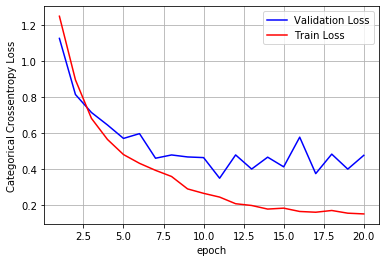

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 

plot_train_cv_loss(training,epochs)

- best epoch is 5. It starts overfitting from epoch 6. Best accuracy is 80.83%

In [30]:
# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [31]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 513        0         0        0                   0   
SITTING                  0      362       123        2                   0   
STANDING                 0       43       481        2                   0   
WALKING                  0        0         0      440                  43   
WALKING_DOWNSTAIRS       0        0         0        3                 413   
WALKING_UPSTAIRS         0        2         0       10                  12   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            24  
SITTING                            4  
STANDING                           6  
WALKING                           13  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 447  


In [32]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 2s 743us/step


In [33]:
score

[0.4773142791923584, 0.9012555140821175]

In [35]:
# Initializing parameters
epochs = 20
batch_size = 25
n_hidden = 100

## 1 LSTM neuron, dropout = 0.5

In [36]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 44,606
Trainable params: 44,606
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 69s 9ms/step - loss: 1.1250 - acc: 0.5233 - val_loss: 0.9185 - val_acc: 0.6284
Epoch 2/20
7352/7352 [==============================] - 65s 9ms/step - loss: 0.6764 - acc: 0.7339 - val_loss: 0.8082 - val_acc: 0.7160
Epoch 3/20
7352/7352 [==============================] - 64s 9ms/step - loss: 0.4409 - acc: 0.8459 - val_loss: 0.4999 - val_acc: 0.8385
Epoch 4/20
7352/7352 [==============================] - 67s 9ms/step - loss: 0.2895 - acc: 0.9045 - val_loss: 0.4942 - val_acc: 0.8487
Epoch 5/20
7352/7352 [==============================] - 65s 9ms/step - loss: 0.2874 - acc: 0.9091 - val_loss: 0.6874 - val_acc: 0.8035
Epoch 6/20
7352/7352 [==============================] - 69s 9ms/step - loss: 0.2332 - acc: 0.9210 - val_loss: 0.3685 - val_acc: 0.8670
Epoch 7/20
7352/7352 [==============================] - 67s 9ms/step - loss: 0.1972 - acc: 0.9276 - val_loss: 0.2790 - val_acc: 0.8880
Epoch 8

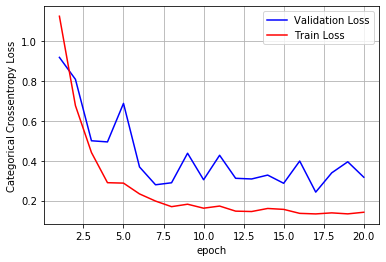

In [39]:
plot_train_cv_loss(training,epochs)

- best epoch is 4. It starts overfitting from 5. Best accuracy is 84.87%

In [40]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 513        0         0        0                   0   
SITTING                  0      412        77        0                   0   
STANDING                 0       91       440        0                   0   
WALKING                  0        1         0      467                   2   
WALKING_DOWNSTAIRS       0        0         0        7                 412   
WALKING_UPSTAIRS         0        0         0        7                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            24  
SITTING                            2  
STANDING                           1  
WALKING                           26  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 463  


In [41]:
score1 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 4s 2ms/step


In [42]:
score1

[0.31687591483809235, 0.9185612487275195]

## 1 LSTM neuron and dropout = 0.8

In [43]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.8))
# Adding a dense output layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 606       
Total params: 44,606
Trainable params: 44,606
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 68s 9ms/step - loss: 1.2264 - acc: 0.4887 - val_loss: 1.0311 - val_acc: 0.5487
Epoch 2/20
7352/7352 [==============================] - 69s 9ms/step - loss: 0.7971 - acc: 0.6697 - val_loss: 0.7719 - val_acc: 0.7177
Epoch 3/20
7352/7352 [==============================] - 67s 9ms/step - loss: 0.6355 - acc: 0.7565 - val_loss: 0.7894 - val_acc: 0.7414
Epoch 4/20
7352/7352 [==============================] - 66s 9ms/step - loss: 0.6046 - acc: 0.7780 - val_loss: 0.5702 - val_acc: 0.7842
Epoch 5/20
7352/7352 [==============================] - 111s 15ms/step - loss: 0.4820 - acc: 0.8453 - val_loss: 0.6750 - val_acc: 0.7913
Epoch 6/20
7352/7352 [==============================] - 68s 9ms/step - loss: 0.3836 - acc: 0.8856 - val_loss: 0.3708 - val_acc: 0.8856
Epoch 7/20
7352/7352 [==============================] - 67s 9ms/step - loss: 0.3273 - acc: 0.9033 - val_loss: 0.3263 - val_acc: 0.8945
Epoch

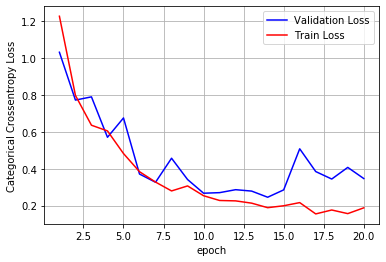

In [46]:
plot_train_cv_loss(training,epochs)

- best epoch is 2. It starts overfitting from 3. Best accuracy is 71.77%

In [47]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 514        0        23        0                   0   
SITTING                  0      376       113        0                   0   
STANDING                 0       60       467        3                   0   
WALKING                  0        0         0      485                   2   
WALKING_DOWNSTAIRS       0        0         2        2                 415   
WALKING_UPSTAIRS         0        4         0        7                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           2  
WALKING                            9  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 460  


In [48]:
score2 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 4s 1ms/step


In [49]:
score2

[0.34641228316512473, 0.9219545300305395]

## 2 LSTM Neurons, dropout = 0.3

In [50]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.3))
#Adding another LSTM layer
model.add(LSTM(200,))
# Adding a dense output layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1206      
Total params: 286,006
Trainable params: 286,006
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [52]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 275s 37ms/step - loss: 0.8513 - acc: 0.6474 - val_loss: 0.6581 - val_acc: 0.7591
Epoch 2/20
7352/7352 [==============================] - 263s 36ms/step - loss: 0.3927 - acc: 0.8628 - val_loss: 0.4598 - val_acc: 0.8714
Epoch 3/20
7352/7352 [==============================] - 264s 36ms/step - loss: 0.2300 - acc: 0.9214 - val_loss: 0.3534 - val_acc: 0.8884
Epoch 4/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.1738 - acc: 0.9336 - val_loss: 0.3017 - val_acc: 0.8938
Epoch 5/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.1575 - acc: 0.9402 - val_loss: 0.5074 - val_acc: 0.8582
Epoch 6/20
7352/7352 [==============================] - 253s 34ms/step - loss: 0.1477 - acc: 0.9459 - val_loss: 0.5478 - val_acc: 0.8945
Epoch 7/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.1292 - acc: 0.9479 - val_loss: 1.6674 - val_acc: 

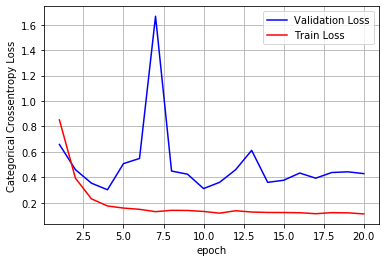

In [53]:
plot_train_cv_loss(training,epochs)

- Best epoch is 6. It starts overfitting from 7. Best accuracy is 88.43% 

In [54]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  7      303       164        0                   0   
STANDING                 0       62       470        0                   0   
WALKING                  1        0         0      466                  28   
WALKING_DOWNSTAIRS       0        0         0        5                 415   
WALKING_UPSTAIRS         0        0         3        2                  34   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           17  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 432  


In [55]:
score3 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 20s 7ms/step


In [56]:
score3

[0.4285913717844088, 0.8900576857821514]

## 2 LSTM Neurons, 2 dropouts

In [57]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.8))
#Adding another LSTM layer
model.add(LSTM(200,))
#Adding another dropout
model.add(Dropout(0.9))
# Adding a dense output layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1206      
Total params: 286,006
Trainable params: 286,006
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [59]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 252s 34ms/step - loss: 1.1332 - acc: 0.5339 - val_loss: 0.9220 - val_acc: 0.5969
Epoch 2/20
7352/7352 [==============================] - 246s 33ms/step - loss: 0.7717 - acc: 0.7016 - val_loss: 0.5850 - val_acc: 0.7944
Epoch 3/20
7352/7352 [==============================] - 245s 33ms/step - loss: 0.5305 - acc: 0.8384 - val_loss: 0.9801 - val_acc: 0.7336
Epoch 4/20
7352/7352 [==============================] - 244s 33ms/step - loss: 0.3049 - acc: 0.9064 - val_loss: 0.4577 - val_acc: 0.8673
Epoch 5/20
7352/7352 [==============================] - 244s 33ms/step - loss: 0.3470 - acc: 0.9059 - val_loss: 0.3690 - val_acc: 0.8968
Epoch 6/20
7352/7352 [==============================] - 246s 33ms/step - loss: 0.2379 - acc: 0.9268 - val_loss: 0.5971 - val_acc: 0.8877
Epoch 7/20
7352/7352 [==============================] - 244s 33ms/step - loss: 0.2438 - acc: 0.9241 - val_loss: 0.4849 - val_acc: 

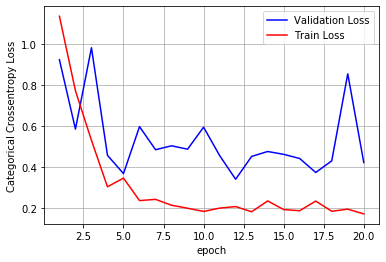

In [60]:
plot_train_cv_loss(training,epochs)

- Best epoch is 2. It starts overfitting from 3. Best accuracy is 79.44%

In [61]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 535        0         0        0                   0   
SITTING                  0      383        84       20                   0   
STANDING                 0       70       462        0                   0   
WALKING                  0        0         0      453                  32   
WALKING_DOWNSTAIRS       0        0         0        1                 417   
WALKING_UPSTAIRS         0        0         2       12                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             2  
SITTING                            4  
STANDING                           0  
WALKING                           11  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 457  


In [62]:
score4 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 20s 7ms/step


In [63]:
score4

[0.4225864914956355, 0.9185612487275195]

## LSTM with 2 Neurons, 2 dropouts, BatchNormalization

In [64]:
from keras.layers import BatchNormalization

# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.4))
#Adding another LSTM layer
model.add(LSTM(200,))
model.add(Dropout(0.3))
model.add(BatchNormalization())
# Adding a dense output layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 200)               240800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 1206      
Total params: 286,806
Trainable params: 286,406
Non-trainable params: 400
_________________________________________________________________


In [65]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [66]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 258s 35ms/step - loss: 0.7539 - acc: 0.6946 - val_loss: 0.7905 - val_acc: 0.8168
Epoch 2/20
7352/7352 [==============================] - 254s 34ms/step - loss: 0.3233 - acc: 0.8832 - val_loss: 2.1740 - val_acc: 0.6749
Epoch 3/20
7352/7352 [==============================] - 253s 34ms/step - loss: 0.2190 - acc: 0.9219 - val_loss: 0.3659 - val_acc: 0.8887
Epoch 4/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.2049 - acc: 0.9253 - val_loss: 0.3399 - val_acc: 0.8873
Epoch 5/20
7352/7352 [==============================] - 255s 35ms/step - loss: 0.1851 - acc: 0.9346 - val_loss: 0.3335 - val_acc: 0.8979
Epoch 6/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.1688 - acc: 0.9388 - val_loss: 0.3956 - val_acc: 0.8951
Epoch 7/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.1707 - acc: 0.9381 - val_loss: 0.4188 - val_acc: 

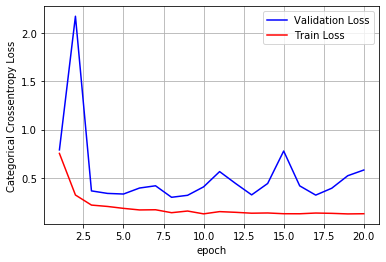

In [67]:
plot_train_cv_loss(training,epochs)

- best epoch is 4. It starts overfitting from 5. Best accuracy is 61.18%

In [68]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  5      416        66        2                   0   
STANDING                 0       97       421       13                   0   
WALKING                  0        0         0      481                  15   
WALKING_DOWNSTAIRS       0        0         0       38                 378   
WALKING_UPSTAIRS         0        0         0       33                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           1  
WALKING                            0  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 434  


In [69]:
score5 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 20s 7ms/step


In [70]:
score5

[0.5819538532469711, 0.9049881235154394]

# 2. Using Binary CrossEntropy

## 1 LSTM Neuron and dropout = 0.4

In [71]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.4))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100)               44000     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 606       
Total params: 44,606
Trainable params: 44,606
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

In [73]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 73s 10ms/step - loss: 0.3492 - categorical_accuracy: 0.4448 - val_loss: 0.3294 - val_categorical_accuracy: 0.4781
Epoch 2/20
7352/7352 [==============================] - 66s 9ms/step - loss: 0.2753 - categorical_accuracy: 0.6064 - val_loss: 0.2249 - val_categorical_accuracy: 0.6902
Epoch 3/20
7352/7352 [==============================] - 66s 9ms/step - loss: 0.1906 - categorical_accuracy: 0.7786 - val_loss: 0.1782 - val_categorical_accuracy: 0.7659
Epoch 4/20
7352/7352 [==============================] - 65s 9ms/step - loss: 0.1351 - categorical_accuracy: 0.8610 - val_loss: 0.1799 - val_categorical_accuracy: 0.7852
Epoch 5/20
7352/7352 [==============================] - 66s 9ms/step - loss: 0.1045 - categorical_accuracy: 0.8945 - val_loss: 0.1598 - val_categorical_accuracy: 0.8303
Epoch 6/20
7352/7352 [==============================] - 66s 9ms/step - loss: 0.0852 - categorical_accuracy

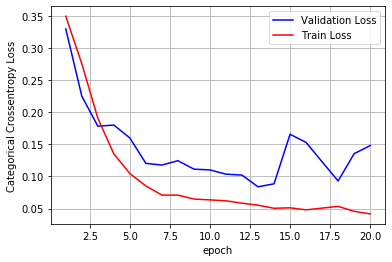

In [74]:
import matplotlib.pyplot as plt
plot_train_cv_loss(training,epochs)

- best epoch is 3. It starts overfitting from epoch 4. Best accuracy is 76.59%

In [75]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        27        0                   0   
SITTING                  0      411        77        1                   0   
STANDING                 0      102       430        0                   0   
WALKING                  0        0         0      448                  45   
WALKING_DOWNSTAIRS       0        0         0        1                 418   
WALKING_UPSTAIRS         0        1         0        9                   8   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                            3  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 453  


In [76]:
score6 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 5s 2ms/step


In [77]:
score6

[0.14798565943513792, 0.9060061079063454]

## 1 LSTM neuron , dropout = 0.8

In [78]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.8))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100)               44000     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 606       
Total params: 44,606
Trainable params: 44,606
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

In [80]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 71s 10ms/step - loss: 0.3891 - categorical_accuracy: 0.4019 - val_loss: 0.3101 - val_categorical_accuracy: 0.5175
Epoch 2/20
7352/7352 [==============================] - 68s 9ms/step - loss: 0.3044 - categorical_accuracy: 0.5692 - val_loss: 0.2972 - val_categorical_accuracy: 0.5304
Epoch 3/20
7352/7352 [==============================] - 66s 9ms/step - loss: 0.2688 - categorical_accuracy: 0.6567 - val_loss: 0.3458 - val_categorical_accuracy: 0.4785
Epoch 4/20
7352/7352 [==============================] - 65s 9ms/step - loss: 0.2147 - categorical_accuracy: 0.7466 - val_loss: 0.2199 - val_categorical_accuracy: 0.7333
Epoch 5/20
7352/7352 [==============================] - 65s 9ms/step - loss: 0.2131 - categorical_accuracy: 0.7892 - val_loss: 0.1698 - val_categorical_accuracy: 0.8124
Epoch 6/20
7352/7352 [==============================] - 66s 9ms/step - loss: 0.1855 - categorical_accuracy

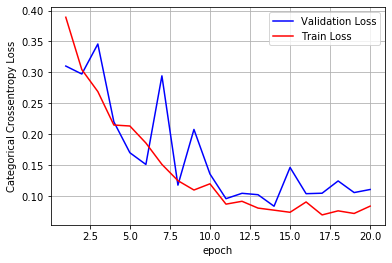

In [81]:
plot_train_cv_loss(training,epochs)

- Best epoch is 1. It start overfitting from epoch 2. Best accuracy 84.01%

In [82]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 522        0        13        0                   0   
SITTING                  0      407        83        1                   0   
STANDING                 0      104       423        5                   0   
WALKING                  0        0         1      491                   4   
WALKING_DOWNSTAIRS       0        0         0       10                 410   
WALKING_UPSTAIRS         0        0         4       55                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             2  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 410  


In [83]:
score7 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 4s 1ms/step


In [84]:
score7

[0.11029730399505142, 0.9036308109942314]

## 2 LSTM neurons, dropout = 0.8

In [85]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.8))
#Adding another LSTM layer
model.add(LSTM(200,))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 128, 100)          44000     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 100)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 200)               240800    
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 1206      
Total params: 286,006
Trainable params: 286,006
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

In [87]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 255s 35ms/step - loss: 0.2815 - categorical_accuracy: 0.5559 - val_loss: 0.2655 - val_categorical_accuracy: 0.5931
Epoch 2/20
7352/7352 [==============================] - 245s 33ms/step - loss: 0.1768 - categorical_accuracy: 0.7587 - val_loss: 0.1551 - val_categorical_accuracy: 0.8208
Epoch 3/20
7352/7352 [==============================] - 245s 33ms/step - loss: 0.0937 - categorical_accuracy: 0.8915 - val_loss: 0.1480 - val_categorical_accuracy: 0.8571
Epoch 4/20
7352/7352 [==============================] - 245s 33ms/step - loss: 0.0667 - categorical_accuracy: 0.9261 - val_loss: 0.1235 - val_categorical_accuracy: 0.8768
Epoch 5/20
7352/7352 [==============================] - 245s 33ms/step - loss: 0.0562 - categorical_accuracy: 0.9365 - val_loss: 0.1018 - val_categorical_accuracy: 0.8948
Epoch 6/20
7352/7352 [==============================] - 245s 33ms/step - loss: 0.0501 - categoric

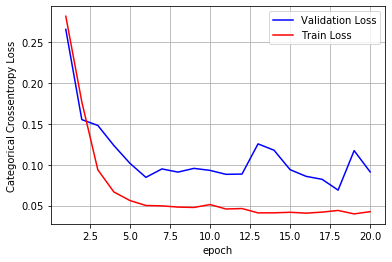

In [88]:
plot_train_cv_loss(training,epochs)

- best epoch is 6. It starts overfitting from epoch 7. Best accuracy 90.02%

In [89]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  5      382        85        0                   0   
STANDING                 0       90       438        0                   0   
WALKING                  0        0         0      468                  11   
WALKING_DOWNSTAIRS       0        0         0        1                 415   
WALKING_UPSTAIRS         0        0         0        4                   3   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           19  
STANDING                           4  
WALKING                           17  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 464  


In [90]:
score8 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 22s 8ms/step


In [91]:
score8

[0.09114118609929235, 0.9175432643366135]

## 2 LSTM neurons,  2 dropouts

In [92]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.8))
#Adding another LSTM layer
model.add(LSTM(200,))
model.add(Dropout(0.9))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 128, 100)          44000     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128, 100)          0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 200)               240800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 1206      
Total params: 286,006
Trainable params: 286,006
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

In [94]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 290s 40ms/step - loss: 0.3722 - categorical_accuracy: 0.4351 - val_loss: 0.2986 - val_categorical_accuracy: 0.5019
Epoch 2/20
7352/7352 [==============================] - 256s 35ms/step - loss: 0.2721 - categorical_accuracy: 0.6160 - val_loss: 0.2896 - val_categorical_accuracy: 0.6142
Epoch 3/20
7352/7352 [==============================] - 255s 35ms/step - loss: 0.2273 - categorical_accuracy: 0.7029 - val_loss: 0.2065 - val_categorical_accuracy: 0.7564
Epoch 4/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.1801 - categorical_accuracy: 0.7909 - val_loss: 0.1925 - val_categorical_accuracy: 0.8093
Epoch 5/20
7352/7352 [==============================] - 254s 35ms/step - loss: 0.1376 - categorical_accuracy: 0.8803 - val_loss: 0.1668 - val_categorical_accuracy: 0.8517
Epoch 6/20
7352/7352 [==============================] - 254s 34ms/step - loss: 0.1195 - categoric

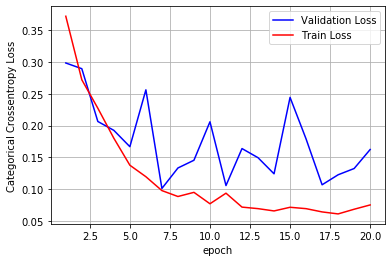

In [95]:
plot_train_cv_loss(training,epochs)

- best epoch is 6. It starts overfitting from epoch 7. Best accuraccy is 96.53%

In [96]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 523        0        14        0                   0   
SITTING                  5      375       105        0                   0   
STANDING                 0       90       441        0                   0   
WALKING                  0        1         1      473                  10   
WALKING_DOWNSTAIRS       0        0         1       25                 390   
WALKING_UPSTAIRS         0        0         0       28                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            6  
STANDING                           1  
WALKING                           11  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 442  


In [97]:
score9 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 20s 7ms/step


In [98]:
score9

[0.16230833367408035, 0.8971835765184933]

## 2 LSTM neurons, 2 dropouts, BatchNormaliztion

In [99]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.8))
#Adding another LSTM layer
model.add(LSTM(200,))
model.add(Dropout(0.9))
model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 128, 100)          44000     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128, 100)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 200)               240800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 1206      
Total params: 286,806
Trainable params: 286,406
Non-trainable params: 400
_________________________________________________________________


In [100]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

In [101]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 273s 37ms/step - loss: 0.4707 - categorical_accuracy: 0.4347 - val_loss: 0.2730 - val_categorical_accuracy: 0.6237
Epoch 2/20
7352/7352 [==============================] - 266s 36ms/step - loss: 0.2824 - categorical_accuracy: 0.6347 - val_loss: 0.2280 - val_categorical_accuracy: 0.7034
Epoch 3/20
7352/7352 [==============================] - 275s 37ms/step - loss: 0.2453 - categorical_accuracy: 0.6997 - val_loss: 0.2308 - val_categorical_accuracy: 0.7299
Epoch 4/20
7352/7352 [==============================] - 277s 38ms/step - loss: 0.2067 - categorical_accuracy: 0.7930 - val_loss: 0.2833 - val_categorical_accuracy: 0.6702
Epoch 5/20
7352/7352 [==============================] - 264s 36ms/step - loss: 0.2030 - categorical_accuracy: 0.8020 - val_loss: 0.1844 - val_categorical_accuracy: 0.8130
Epoch 6/20
7352/7352 [==============================] - 289s 39ms/step - loss: 0.1653 - categoric

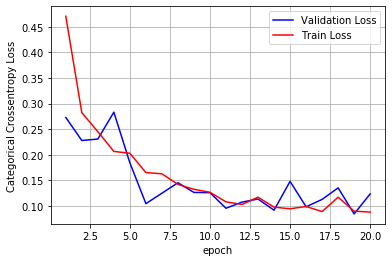

In [102]:
plot_train_cv_loss(training,epochs)

In [103]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 536        0         1        0                   0   
SITTING                  1      369       119        0                   0   
STANDING                 0       55       477        0                   0   
WALKING                  0        0         0      455                  37   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        0         0        0                  22   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 449  


In [104]:
score10 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 20s 7ms/step


In [105]:
score10

[0.12357697055033087, 0.9182219205972175]

In [128]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.title = " categorical cross entropy "
pt.field_names = ["LSTM Layers",'Neurons','Dropout', 'Best Epoch','Accuracy']
pt.add_row(["1","32","0.5","5","80.83"])
pt.add_row(["1","100","0.5","4","84.87"])
pt.add_row(["1","100","0.8","2","71.77"])
pt.add_row(["2","100,200","0.3","4","89.38"])
pt.add_row(["2","100,200","0.8,0.9","1","79.44"])
print(pt)

pt = PrettyTable()
pt.title ="Binary cross entropy"
pt.field_names = ["LSTM Layers",'Neurons','Dropout', 'Best Epoch','Accuracy']
pt.add_row(["1","100","0.4","3","76.59"])
pt.add_row(["1","100","0.8","1","53.04"])
pt.add_row(["2","100,200","0.8","6","90.02"])
pt.add_row(["2","100,200","0.8,0.9","5","85.97"])
print(pt)

pt= PrettyTable()
pt.title="With batch normalization"
pt.field_names = ["LSTM Layers",'Neurons','Dropout', 'Best Epoch','Accuracy','entropy']
pt.add_row(["2","100,200","0.4,0.3","1","81.68","categorical cross entropy"])
pt.add_row(["2","100,200","0.8,0.9","2","70.34","binary cross entropy"])
print(pt)

+-------------+---------+---------+------------+----------+
| LSTM Layers | Neurons | Dropout | Best Epoch | Accuracy |
+-------------+---------+---------+------------+----------+
|      1      |    32   |   0.5   |     5      |  80.83   |
|      1      |   100   |   0.5   |     4      |  84.87   |
|      1      |   100   |   0.8   |     2      |  71.77   |
|      2      | 100,200 |   0.3   |     4      |  89.38   |
|      2      | 100,200 | 0.8,0.9 |     1      |  79.44   |
+-------------+---------+---------+------------+----------+
+-------------+---------+---------+------------+----------+
| LSTM Layers | Neurons | Dropout | Best Epoch | Accuracy |
+-------------+---------+---------+------------+----------+
|      1      |   100   |   0.4   |     3      |  76.59   |
|      1      |   100   |   0.8   |     1      |  53.04   |
|      2      | 100,200 |   0.8   |     6      |  90.02   |
|      2      | 100,200 | 0.8,0.9 |     5      |  85.97   |
+-------------+---------+---------+-----

In [52]:
from keras.regularizers import L1L2
from keras.initializers import he_normal
import keras

# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.3))
#Adding another LSTM layer
model.add(LSTM(64,))
model.add(Dropout(0.3))

# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 128, 48)           11136     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128, 48)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 64)                28928     
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 390       
Total params: 40,454
Trainable params: 40,454
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 155s 21ms/step - loss: 1.2592 - acc: 0.4453 - val_loss: 1.1319 - val_acc: 0.5168
Epoch 2/20
7352/7352 [==============================] - 146s 20ms/step - loss: 1.0118 - acc: 0.5326 - val_loss: 1.0286 - val_acc: 0.5273
Epoch 3/20
7352/7352 [==============================] - 159s 22ms/step - loss: 0.8836 - acc: 0.5598 - val_loss: 0.9143 - val_acc: 0.5168
Epoch 4/20
7352/7352 [==============================] - 155s 21ms/step - loss: 0.9542 - acc: 0.5411 - val_loss: 0.9337 - val_acc: 0.5012
Epoch 5/20
7352/7352 [==============================] - 159s 22ms/step - loss: 0.8646 - acc: 0.5718 - val_loss: 0.8620 - val_acc: 0.5908
Epoch 6/20
7352/7352 [==============================] - 151s 20ms/step - loss: 0.7559 - acc: 0.6330 - val_loss: 0.7864 - val_acc: 0.6267
Epoch 7/20
4576/7352 [=================>............] - ETA: 53s - loss: 0.6973 - acc: 0.6565

KeyboardInterrupt: 

In [ ]:
plot_train_cv_loss(training,epochs)

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

In [ ]:
score11 = model.evaluate(X_test, Y_test)

In [115]:
score11

[0.332028348539614, 0.8903970139124533]

In [116]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences = True))
# Adding a dropout layer
model.add(Dropout(0.8))
#Adding another LSTM layer
model.add(LSTM(200,))
model.add(Dropout(0.9))
model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 128, 100)          44000     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128, 100)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 200)               240800    
_________________________________________________________________
dropout_22 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 1206      
Total params: 286,806
Trainable params: 286,406
Non-trainable params: 400
_________________________________________________________________


In [117]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [118]:
# Training the model
training = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 255s 35ms/step - loss: 0.5388 - categorical_accuracy: 0.3150 - val_loss: 0.4306 - val_categorical_accuracy: 0.2698
Epoch 2/20
7352/7352 [==============================] - 249s 34ms/step - loss: 0.3821 - categorical_accuracy: 0.4459 - val_loss: 0.3170 - val_categorical_accuracy: 0.4968
Epoch 3/20
7352/7352 [==============================] - 248s 34ms/step - loss: 0.3356 - categorical_accuracy: 0.5049 - val_loss: 0.5517 - val_categorical_accuracy: 0.1761
Epoch 4/20
7352/7352 [==============================] - 248s 34ms/step - loss: 0.3626 - categorical_accuracy: 0.4368 - val_loss: 0.3139 - val_categorical_accuracy: 0.4676
Epoch 5/20
7352/7352 [==============================] - 249s 34ms/step - loss: 0.4169 - categorical_accuracy: 0.3202 - val_loss: 0.4420 - val_categorical_accuracy: 0.1731
Epoch 6/20
7352/7352 [==============================] - 249s 34ms/step - loss: 0.4417 - categoric

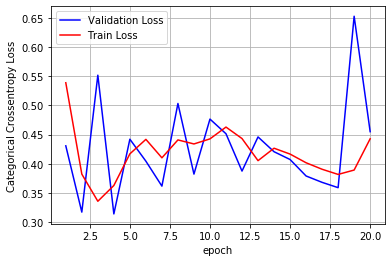

In [119]:
plot_train_cv_loss(training,epochs)

In [120]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  STANDING
True                                
LAYING                  93       444
SITTING                 17       474
STANDING                 0       532
WALKING                  9       487
WALKING_DOWNSTAIRS      10       410
WALKING_UPSTAIRS        35       436


In [121]:
score12 = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 21s 7ms/step


In [122]:
score12

[0.4549274587068956, 0.21208008143875126]

In [129]:
pt= PrettyTable()
pt.title="With batch normalization"
pt.field_names = ["LSTM Layers",'Neurons','Dropout', 'Best Epoch','Accuracy','entropy']
pt.add_row(["2","100,200","0.4,0.3","1","71.63","categorical cross entropy"])
pt.add_row(["2","100,200","0.8,0.9","2","49.68","binary cross entropy"])
print(pt)

+-------------+---------+---------+------------+----------+---------------------------+
| LSTM Layers | Neurons | Dropout | Best Epoch | Accuracy |          entropy          |
+-------------+---------+---------+------------+----------+---------------------------+
|      2      | 100,200 | 0.4,0.3 |     1      |  71.63   | categorical cross entropy |
|      2      | 100,200 | 0.8,0.9 |     2      |  49.68   |    binary cross entropy   |
+-------------+---------+---------+------------+----------+---------------------------+


## Conclusion:
- Best accuracy obtained while using categorical cross entropy is 89.38%
- Best accuracy obtained while using binary cross entropy is 90.02%
- By using BatchNormalization the performance hadn't improved.